In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [51]:
def default_pars( **kwargs):
    pars = {}
    pars['R0'] = 864
    pars['Ego'] = 1.44
    pars['SI'] = 0.72#0.62#0.72
    pars['sigma'] = 43.2
    pars['alpha'] = 20000  
    pars['k'] = 432
    
    pars['d0'] = 0.06
    pars['R1'] = 0.84/np.power(10,3)
    pars['R2'] = 0.24/np.power(10,5)
    
    ### simulation parameters ###
    pars['T'] = 500.0 # Total duration of simulation [ms]
    pars['dt'] = .001  # Simulation time step [ms]

    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars

In [17]:
def run_diabetes(pars,beta_param):
    
    R0 = pars['R0']
    Ego = pars['Ego']
    SI = pars['SI']
    sigma = pars['sigma']
    alpha = pars['alpha']
    k = pars['k']
    
    beta =beta_param#150 #300

    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
 
    # Initialize 
    G = np.zeros(Lt) # pathogen levels
    G[0] =100
    I = np.zeros(Lt) # pathogen levels
    I[0] =10  
    diet=0
    for it in range(Lt-1):
        
        if (it > 400)&(diet==0):
            G[it]=250
            diet=1
        dG = (R0-(Ego+SI*I[it])*G[it]) *dt
        dI = ( (beta*sigma*  ( np.power(G[it],2)/(alpha+np.power(G[it],2)) ))-k*I[it]) *dt

        
        #update
        G[it+1] = G[it] + dG
        I[it+1] = I[it] + dI
    return G,I

In [18]:
pars = default_pars()
beta_param = 300

G,I =run_diabetes(pars,beta_param)
G[-1],I[-1]

(100.00131184778152, 10.00018281508883)

Text(0, 0.5, 'Glucose')

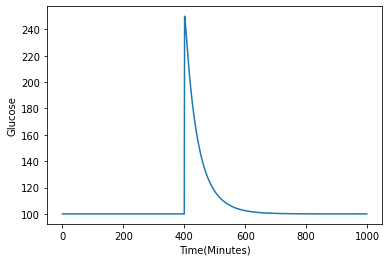

In [23]:
plt.plot(G)
plt.xlabel('Time(Minutes)')
plt.ylabel('Glucose')

Text(0, 0.5, 'Insulin')

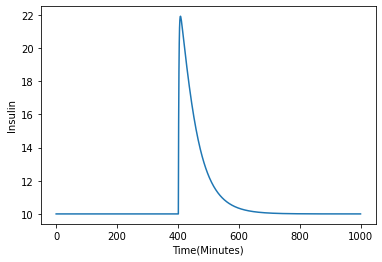

In [24]:
plt.plot(I)
plt.xlabel('Time(Minutes)')
plt.ylabel('Insulin')

In [25]:
def bifurcation_dia(pars,beta_param):
    R0 = pars['R0']
    Ego = pars['Ego']
    SI = pars['SI']
    sigma = pars['sigma']
    alpha = pars['alpha']
    k = pars['k']
    
    beta =beta_param#150 #300
    
    dG_append=[]
    I_append = []

    dI_append=[]
    G_append = []
    
    G_init=0
    I_init=0    
    for i in range(0,3000):

        I =(I_init + i * 0.01)
        G =(G_init + i * 0.2)
        
        dG = R0/(Ego+SI*I)
#         dI = ( (beta*sigma*  ( np.power(G[it],2)/(alpha+np.power(G[it],2)) ))-k*I[it])
        dI = (beta*sigma* np.power(G,2))/((alpha+np.power(G,2)) *k)
    
        I_append.append(I)
        dG_append.append(dG)
        G_append.append(G)
        dI_append.append(dI)
        
    return(I_append,dG_append,G_append,dI_append)


In [26]:
# pars = default_pars()
I_bif,dG_bif,G_bif,dI_bif =bifurcation_dia(pars,beta_param)
# I_bif[-1],dG_bif[-1],G_bif[-1],dI_bif[-1]

Text(0, 0.5, 'Glucose')

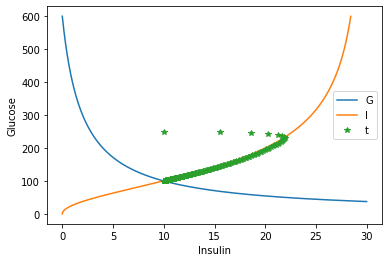

In [37]:
plt.plot(I_bif,dG_bif)
plt.plot(dI_bif,G_bif)
plt.plot(I,G,'*')
plt.legend('GIt')
plt.xlabel('Insulin')
plt.ylabel('Glucose')

In [40]:
def run_betaInsulinGlu_model(pars,beta_param):
    
    R0 = pars['R0']
    Ego = pars['Ego']
    SI = pars['SI']
    sigma = pars['sigma']
    alpha = pars['alpha']
    k = pars['k']
    d0 = pars['d0']
    R1 = pars['R1']
    R2 = pars['R2']

    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size    
    
    # Initialize 
    G = np.zeros(Lt) # pathogen levels
#     G[0] =G_param
    G[0] = 100
    I = np.zeros(Lt) # pathogen levels
#     I[0] =(((R0/G[0])-Ego)/SI)  
    I[0] =10
    beta= np.zeros(Lt) # pathogen levels
    beta[0] =beta_param   
#     beta[0] =(k*I[0]*(alpha+np.power(G[0],2)))/ (sigma*np.power(G[0],2))
    print(G[0],I[0],beta[0])

    for it in range(Lt-1):        
        dG = (R0-(Ego+SI*I[it])*G[it]) *dt
        dI = ( (beta[it]*sigma*  ( np.power(G[it],2)/(alpha+np.power(G[it],2)) ))-k*I[it]) *dt
        dbeta = (-d0+R1*G[it]-R2*np.power(G[it],2))*beta[it] *dt      
        #update
        beta[it+1] = beta[it] + dbeta
        G[it+1] = G[it] + dG
        I[it+1] = I[it] + dI
    return G,I,beta

In [52]:
pars = default_pars()
beta_param = 200
G,I,beta =run_betaInsulinGlu_model(pars,beta_param)

100.0 10.0 200.0


In [53]:
G[-1],I[-1],beta[-1]

(100.01326171195973, 9.99841142496899, 299.8993164455172)

Text(0, 0.5, 'Glucose')

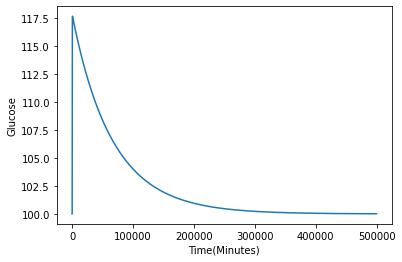

In [74]:
plt.plot(G)
plt.xlabel('Time(Minutes)')
plt.ylabel('Glucose')

Text(0, 0.5, 'Beta')

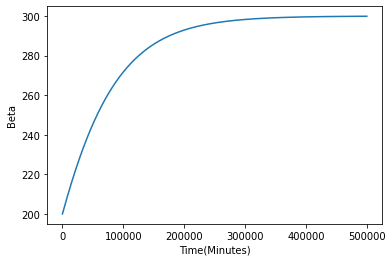

In [75]:
plt.plot(beta)
plt.xlabel('Time(Minutes)')
plt.ylabel('Beta')

Text(0, 0.5, 'Insulin')

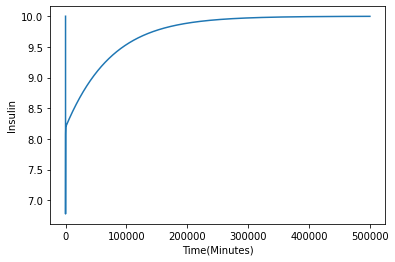

In [76]:
plt.plot(I)
plt.xlabel('Time(Minutes)')
plt.ylabel('Insulin')

Text(0, 0.5, 'Glucose')

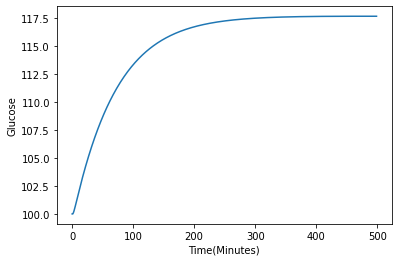

In [77]:
plt.plot(G[0:500])
plt.xlabel('Time(Minutes)')
plt.ylabel('Glucose')

Text(0, 0.5, 'Insulin')

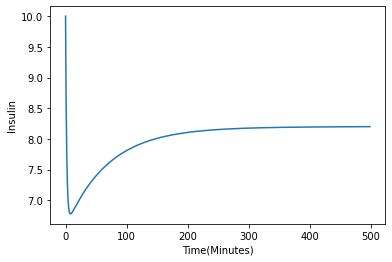

In [78]:
plt.plot(I[0:500])
plt.xlabel('Time(Minutes)')
plt.ylabel('Insulin')

Text(0, 0.5, 'Glucose')

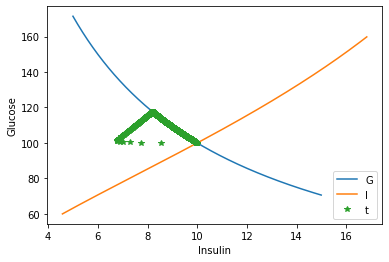

In [73]:
plt.plot(I_bif[500:1500],dG_bif[500:1500])
plt.plot(dI_bif[300:800],G_bif[300:800])
plt.plot(I,G,'*')
plt.legend('GIt')
plt.xlabel('Insulin')
plt.ylabel('Glucose')